In [32]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

## Dummy dataset

In [4]:
df = pd.read_csv('../data/train.csv')

In [5]:
df.head()

,id,y,age,job,marital,education,default,housing,loan,contact,...,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,36,blue-collar,married,basic.9y,unknown,no,no,telephone,...,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
1,1,0,34,technician,married,professional.course,no,yes,no,cellular,...,4,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
2,2,0,28,student,single,university.degree,unknown,yes,no,cellular,...,4,2,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1
3,3,0,36,technician,single,high.school,no,yes,no,cellular,...,4,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1
4,4,0,53,blue-collar,married,unknown,unknown,yes,no,cellular,...,5,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1


In [6]:
data = df[['month', 'campaign', 'previous', 'marital', 'job']]

In [7]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore

# create some data with dependencies
# data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 8)), columns=list('ABCDEFGH'))
# data['A'] += data['B'] + data['C']
# data['H'] = data['G'] - data['A']

hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())

[('month', 'job'), ('previous', 'month'), ('job', 'marital')]


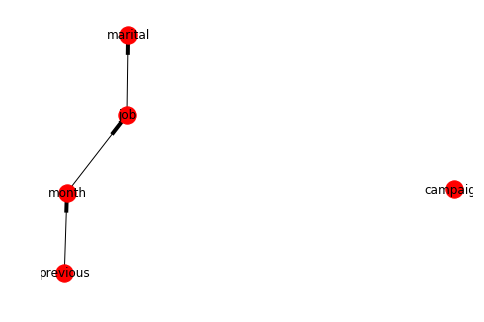

In [8]:
nx.draw(best_model, with_labels=True, pos=graphviz_layout(best_model))
plt.show()

## Credit Card Fraud

In [40]:
df = pd.read_csv('../data/171003_df_cleansed.csv')

In [41]:
print(df.shape)
print(df[df['fraudulent'] == 1].shape)

(15487, 126)
(423, 126)


#### Process data

In [42]:
df['credit_card_holder_and_passenger_similarity_cat'] = pd.cut(df['credit_card_holder_and_passenger_similarity'], bins=3, include_lowest=True)

In [43]:
df['credit_card_min_age_in_days_cat'] = pd.cut(df['credit_card_min_age_in_days'], bins=10, include_lowest=True)

In [44]:
df['flight_price_per_passenger_cat'] = pd.cut(df['flight_price_per_passenger'], bins=10, include_lowest=True)

In [45]:
df['credit_card_min_sales_count_cat'] =  pd.cut(df['credit_card_min_sales_count'], bins=10, include_lowest=True)

In [46]:
df.flight_price_per_passenger_cat.unique()

[[-60.201, 6020.083], (6020.083, 12040.166], (18060.249, 24080.332], (12040.166, 18060.249], (24080.332, 30100.415], (36120.498, 42140.581], (54180.747, 60200.83], (30100.415, 36120.498], (48160.664, 54180.747]]
Categories (9, object): [[-60.201, 6020.083] < (6020.083, 12040.166] < (12040.166, 18060.249] < (18060.249, 24080.332] ... (30100.415, 36120.498] < (36120.498, 42140.581] < (48160.664, 54180.747] < (54180.747, 60200.83]]

In [47]:
df.credit_card_min_age_in_days_cat.unique()

[[-0.826, 82.6], (165.2, 247.8], (247.8, 330.4], (82.6, 165.2], (330.4, 413], (495.6, 578.2], (413, 495.6], (578.2, 660.8], (743.4, 826], (660.8, 743.4]]
Categories (10, object): [[-0.826, 82.6] < (82.6, 165.2] < (165.2, 247.8] < (247.8, 330.4] ... (495.6, 578.2] < (578.2, 660.8] < (660.8, 743.4] < (743.4, 826]]

In [48]:
df.credit_card_holder_and_passenger_similarity_cat.unique()

[(0.333, 1], (-0.333, 0.333], [-1.002, -0.333]]
Categories (3, object): [[-1.002, -0.333] < (-0.333, 0.333] < (0.333, 1]]

In [50]:
#filter features
# data = df[[
#     'credit_card_holder_and_passenger_similarity',
#     'credit_card_min_age_in_days',
#     'flight_price_per_passenger',
#     'credit_card_min_sales_count',
#     'credit_card_max_sales_count_24h',
#     'flight_hours_to_departure',
#     'credit_card_holder_diff',
#     'credit_card_last_names_association_count',
#     'fraudulent'
# ]]


#filter features
data = df[[
    'credit_card_holder_and_passenger_similarity_cat',
    'credit_card_min_age_in_days_cat',
    'flight_price_per_passenger_cat',
    'credit_card_min_sales_count_cat',
    'fraudulent'
]]

In [51]:
hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())

[('credit_card_min_age_in_days_cat', 'fraudulent'), ('credit_card_min_age_in_days_cat', 'credit_card_holder_and_passenger_similarity_cat'), ('credit_card_min_age_in_days_cat', 'credit_card_min_sales_count_cat')]


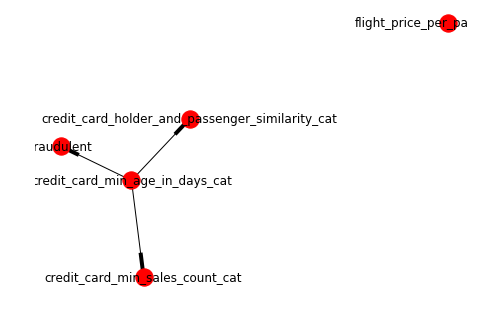

In [52]:
nx.draw(best_model, with_labels=True, pos=graphviz_layout(best_model))
plt.show()